# Exploratory Data Analysis

Author: Gillian A. McGinnis, final-semester M.S. Information Science - Machine Learning  
The University of Arizona College of Information  
INFO 698 - Capstone  
Start date: 24 September 2025  
Last updated: 04 October 2025

In [1]:
"""
Module providing supporting code and generating all images/tables for EDA.
"""

'\nModule providing supporting code and generating all images/tables for EDA.\n'

## Load Required Libraries

In [2]:
# General packages
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime as dt

In [3]:
## (Optional chunk)
# Current session information
import session_info
session_info.show(dependencies=False)

## Load data

Files of interest:
- `weir_calibration.csv` includes calibration points for the weir
- `bci_lutzweir_combined.csv` includes raw runoff measurement, corrected runoff measurement, data source (*Chart measurements can be removed)
- `bci_cl_ra_elect2.CSV` has corrected rainfall (`ra`) in mm with measurements of `0` as `NA`s (`bci_cl_ra_elect.csv` has `0`s)
- `bci_lutz_deep_gsm_man.csv`, `bci_lutz_shallow_gsm_man.csv` have soil moisture measurements (water by wet weight and water by dry weight; one can be chosen for analysis as they are linearly related)
<!-- `bci_cl_ra_elect.csv` has corrected rainfall (`ra`) in mm, contains `0`s (large file) -->

All values level values are in mm, and datetime is in UTC-5 (Panama time zone).


### Import

In [ ]:
## Calibrations dataset
data_all_calibration = pd.read_csv(
    "data/weir_calibration.csv",
    usecols = ['datetime', 'weir_level'], # weir_hour is a repeat of the time in datetime and can be skipped
    parse_dates=['datetime'],
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

data_all_calibration.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6465 entries, 1994-01-03 08:46:00 to 2025-09-02 08:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   weir_level  6465 non-null   int64
dtypes: int64(1)
memory usage: 101.0 KB


In [5]:
# Combined data

data_all_combined = pd.read_csv(
    "data/bci_lutzweir_combined.csv",
    usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
    parse_dates=['datetime'],
    dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

## This variation checks first if the dataset is already loaded into the workspace
# try:
#     if data_combined.empty == False:
#         print("Data loaded, random sample shown below")
#         print(data_combined.sample(n=5))
# except NameError:
#     print("Data has not yet been read in, loading now...")
#     data_combined = pd.read_csv(
#         "data/bci_lutzweir_combined.csv",
#         usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
#         parse_dates=['datetime'],
#         dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
#         date_format='%d/%m/%Y %H:%M:%S'
#     )

data_all_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3951119 entries, 1972-01-01 01:00:00 to 1977-03-06 23:45:00
Data columns (total 6 columns):
 #   Column    Dtype   
---  ------    -----   
 0   level     float64 
 1   raw       float64 
 2   chk_note  category
 3   chk_fail  object  
 4   comment   object  
 5   source    category
dtypes: category(2), float64(2), object(2)
memory usage: 158.3+ MB


In [6]:
# Rainfall dataset

# This data set skips the 0 readings (therefore much smaller):
data_all_rainfall = pd.read_csv(
    "data/bci_elect_cl_ra/bci_cl_ra_elect2.CSV",
    parse_dates=['datetime'],
    dtype = {'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

## This data set includes the 0 readings:
# data_rainfall_zeroes = pd.read_csv(
#         "data/bci_elect_cl_ra/bci_cl_ra_elect.csv",
#         usecols = ['datetime', 'ra', 'raw', 'chk_note', 'chk_fail'],
#         # "data/bci_elect_cl_ra/bci_cl_ra_elect2.CSV",
#         # usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
#         parse_dates=['datetime'],
#         dtype = {'chk_note':'category', 'chk_fail':'str'},
#         # dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
#         date_format='%d/%m/%Y %H:%M:%S'
#     )

data_all_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179640 entries, 1929-01-02 08:00:00 to 2025-08-04 11:55:00
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   ra        179640 non-null  float64 
 1   raw       179640 non-null  float64 
 2   chk_note  179640 non-null  category
 3   chk_fail  29 non-null      object  
dtypes: category(1), float64(2), object(1)
memory usage: 5.7+ MB


In [7]:
# Soil datasets

# Shallow
data_all_soil_shallow = pd.read_csv(
    "data/bci_manual_soilh/bci_lutz_shallow_gsm_man.csv",
    parse_dates=['date'],
    usecols = ['date', 'depth', 'sample', 'h2o_by_wet', 'chk_note', 'chk_fail'],
    dtype = {'depth':'category', 'sample':'category', 'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y',
    index_col='date'
)

# Deep
data_all_soil_deep = pd.read_csv(
    "data/bci_manual_soilh/bci_lutz_deep_gsm_man.csv",
    parse_dates=['date'],
    usecols = ['date', 'depth', 'sample', 'h2o_by_wet', 'chk_note', 'chk_fail'],
    dtype = {'depth':'category', 'sample':'category', 'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y',
    index_col='date'
)

data_all_soil_shallow.info()
data_all_soil_deep.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18556 entries, 1972-03-03 to 2025-06-26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   depth       18556 non-null  category
 1   sample      18556 non-null  category
 2   h2o_by_wet  18556 non-null  float64 
 3   chk_note    18556 non-null  category
 4   chk_fail    178 non-null    object  
dtypes: category(3), float64(1), object(1)
memory usage: 490.8+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15637 entries, 1972-03-03 to 2025-06-26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   depth       15637 non-null  category
 1   sample      15637 non-null  category
 2   h2o_by_wet  15637 non-null  float64 
 3   chk_note    15637 non-null  category
 4   chk_fail    20 non-null     object  
dtypes: category(3), float64(1), object(1)
memory usage: 413.4+ KB


*A note about the soil datasets:

Both `h2o_by_wet` and `h2o_by_dry` are available in the datasets.
Because they are linearly related to each other, only one of them is necessary for modelling.
Arbitrarily, `h2o_by_wet` has been chosen for this analysis.

### Cleanup

Some data cleanup is necessary to ensure ease of combining the sets and creation of the models.

#### Dates

In [8]:
# Get earliest and latest dates of sources

cat_source = data_all_combined.sort_index()['source'].unique().tolist()
# Header for printed table
print("Earliest", "\t    ", "Latest", "\t\t", "Source")
# Iterate across each source type
for cat in cat_source:
    # If the source is NaN
    if pd.isna(cat) == True:
        temp_subset = data_all_combined[data_all_combined['source'].isnull()]
    else:
        temp_subset = data_all_combined[data_all_combined['source'] == cat]
    # Sort index
    temp_subset = temp_subset.sort_index()
    # Print
    print(temp_subset.index[0], "", temp_subset.index[-1], cat)

# Save space, remove no longer needed items
del cat_source, cat, temp_subset

Earliest 	     Latest 		 Source
1972-01-01 01:00:00  2015-03-18 14:15:00 CHART
1972-09-16 00:15:00  2025-08-01 13:00:00 nan
1989-07-19 11:55:00  1996-10-01 23:55:00 CHART+AF
1996-10-02 00:00:00  2013-01-13 05:50:00 ISCO
2012-04-23 08:30:00  2012-04-24 08:35:00 ESTIMATED
2014-08-22 10:30:00  2021-05-19 09:40:00 RADAR
2018-08-31 10:05:00  2018-09-05 12:55:00 TROLL


In [9]:
# Create function to filter dates
def filter_dates(input_dataset, input_date_start, input_date_end, drop_dates = False):
# def filter_dates(input_dataset, input_date_start = date_weir_start, input_date_end = date_weir_end, drop_dates = False):
    """Function to filter inputted data set by start and end dates.
    
    Args:
        input_dataset (pd.DataFrame): Data indexed by datetime.
        input_date_start (Timestamp): The start date, defaults to the earliest from the combined data set.
        input_date_end (Timestamp): The end date, defaults to the earliest from the combined data set.
        drop_dates (bool): Whether to remove the values between the specified dates.
    
    Returns:
        DataFrame sorted and filtered to be within the specified range.
    """
    # Sort the dataframe
    data_subset = input_dataset.sort_index()
    # Filter between dates
    if drop_dates == False:
        # data_subset = data_subset.loc[input_date_start:input_date_end]
        data_subset = data_subset[input_date_start:input_date_end]
    else:
        data_subset = data_subset.drop(data_subset.loc[input_date_start:input_date_end].index)
    return data_subset

Only values that are not solely reliant on CHART will be evaluated (i.e., after 1989).

In [10]:
# Filter the dataset to start once values stopped by being recorded by CHART
date_weir_start = data_all_combined[data_all_combined['source'] == 'CHART+AF'].sort_index().index[0]
date_weir_end = data_all_combined.sort_index().index[-1]

print("Non-CHART values:", date_weir_start, "through", date_weir_end)

Non-CHART values: 1989-07-19 11:55:00 through 2025-08-01 13:00:00


In 2013 & 2014, the electronic sensor died and there was no backup. Values were recorded using CHART resource, and gap filled accordingly.
The model cannot be trained on this data, as is using a different resource and all `raw` values are `-999.0`.

In [11]:
# data_gap = data_all_combined.sort_index()['2013-01-01 00:00:00':'2014-08-22 23:59:59']
data_gap = filter_dates(data_all_combined, '2013-01-01 00:00:00', '2014-08-22 23:59:59')

# The ISCO sensor failed in early 2013
# Get the earliest date of gap filling
date_gap_start = data_gap[data_gap['source'] == 'CHART'].index[0]

# Values started being recorded with RADAR in late 2014
# Get the latest date of gap filling
date_gap_end = data_gap[data_gap['source'] != 'RADAR'].index[-1]

print("Two year gap:", date_gap_start, "through", date_gap_end)
## EXPECTED -- 2013-01-02 18:54:38 - 2014-08-22 10:21:32
del data_gap

Two year gap: 2013-01-02 18:54:38 through 2014-08-22 10:21:32


In [ ]:
# Apply filter
data_combined = filter_dates(data_all_combined, date_weir_start, date_weir_end)
data_combined = filter_dates(data_combined, date_gap_start, date_gap_end, drop_dates = True)

data_calibration = filter_dates(data_all_calibration, date_weir_start, date_weir_end)
data_calibration = filter_dates(data_calibration, date_gap_start, date_gap_end, drop_dates = True)

data_rainfall = filter_dates(data_all_rainfall, date_weir_start, date_weir_end)
data_rainfall = filter_dates(data_rainfall, date_gap_start, date_gap_end, drop_dates = True)

data_soil_deep = filter_dates(data_all_soil_deep, date_weir_start, date_weir_end)
data_soil_deep = filter_dates(data_soil_deep, date_gap_start, date_gap_end, drop_dates = True)

data_soil_shallow = filter_dates(data_all_soil_shallow, date_weir_start, date_weir_end)
data_soil_shallow = filter_dates(data_soil_shallow, date_gap_start, date_gap_end, drop_dates = True)

In [13]:
# data_combined['source'].value_counts(dropna=False)
# data_combined['chk_note'].value_counts(dropna=False)
data_combined.groupby(['source', 'chk_note'],dropna=False).size()
# data_combined[data_combined['source'].isnull()]

/var/folders/dr/4_7b2hbn60q7cynx4gmn5vhr0000gp/T/ipykernel_85595/3831225816.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_combined.groupby(['source', 'chk_note'],dropna=False).size()


source     chk_note
CHART      adjusted       4832
           good           6081
           missing        1362
           nc             2165
           bad               0
CHART+AF   adjusted     103743
           good         648692
           missing           0
           nc                0
           bad               0
ISCO       adjusted     194397
           good        1450598
           missing           0
           nc             9941
           bad               0
ESTIMATED  adjusted         21
           good            269
           missing           0
           nc                0
           bad               0
RADAR      adjusted     334405
           good         352965
           missing           0
           nc            15334
           bad               0
TROLL      adjusted        277
           good           1151
           missing           0
           nc                0
           bad               0
nan        adjusted     145834
           good    

In [14]:
# Remove old stuff to save space
del data_all_combined, data_all_rainfall, data_all_soil_shallow, data_all_soil_deep

#### Soil depths
There are some duplicated records between the "shallow" and "deep" data set. Most are identical, but there were two dates with differing records.
It was concluded that those values from the "deep" set with a depth of "0–10" may be eliminated.

In [15]:
# Select the values in the deep data set that have the shallower depth
data_deep_subset = data_soil_deep[data_soil_deep["depth"] != "30-40"]
# Filter set to only be of dates where deep set has shallow values
data_shallow_subset = data_soil_shallow[data_soil_shallow.index.isin(data_deep_subset.index)]
# Inner merge based on date and sample number
data_soil_mismatch = pd.merge(data_deep_subset.reset_index(), data_shallow_subset.reset_index(), on=["date", "sample"], suffixes=("_deep", "_shallow"), how="inner")
# Create a variable to indicate if the values match
data_soil_mismatch["match_wet"] = (data_soil_mismatch["h2o_by_wet_deep"] == data_soil_mismatch["h2o_by_wet_shallow"])
# The dry var was not loaded in this analysis, but the exact same issue occurred in it (i.e., the same dates had mismatching values)
# match_all["match_dry"] = (match_all["h2o_by_dry_deep"] == match_all["h2o_by_dry_shallow"])
# Set the sample var to be an integer, for sorting purposes
data_soil_mismatch["sample"] = data_soil_mismatch["sample"].astype('int')
# Sort by date and sample for readability
data_soil_mismatch = data_soil_mismatch.sort_values(by=['date', 'sample'])
# Remove unneeded columns
data_soil_mismatch = data_soil_mismatch.drop(['chk_fail_shallow', 'chk_fail_deep'], axis=1)
# Filter where there is a mismatch
data_soil_mismatch = data_soil_mismatch[(data_soil_mismatch["match_wet"]==False)]
# match_all = match_all[['date', 'depth_shallow', 'depth_deep', 'sample', 'h2o_by_wet_shallow', 'h2o_by_wet_deep', 'h2o_by_dry_shallow', 'h2o_by_dry_deep', 'chk_note_shallow', 'chk_note_deep']]
# Reordering vars for readability
data_soil_mismatch = data_soil_mismatch[['date', 'depth_shallow', 'depth_deep', 'sample', 'h2o_by_wet_shallow', 'h2o_by_wet_deep', 'chk_note_shallow', 'chk_note_deep']]
# Print result
data_soil_mismatch

,date,depth_shallow,depth_deep,sample,h2o_by_wet_shallow,h2o_by_wet_deep,chk_note_shallow,chk_note_deep
129,2005-06-16,1-10,0-10,1,43.0,40.8,good,good
128,2005-06-16,1-10,0-10,2,37.8,36.5,good,good
127,2005-06-16,1-10,0-10,3,36.1,36.4,good,good
126,2005-06-16,1-10,0-10,4,38.4,38.6,good,good
125,2005-06-16,1-10,0-10,5,37.7,37.5,good,good
124,2005-06-16,1-10,0-10,6,37.9,37.5,good,good
123,2005-06-16,1-10,0-10,7,32.7,34.1,good,good
122,2005-06-16,1-10,0-10,8,28.1,28.8,good,good
121,2005-06-16,1-10,0-10,9,34.2,33.2,good,good
120,2005-06-16,1-10,0-10,10,32.1,32.2,good,good


In [16]:
# Cleanup
del data_shallow_subset, data_deep_subset, data_soil_mismatch

In [17]:
# Remove the duplicated samples
data_soil_deep = data_soil_deep[data_soil_deep["depth"] != "0-10"]

## Exploration

### General Variables

In [18]:
# Explore weir combined data, comments, etc.
print(
    "-----Data types-----", data_combined.dtypes,
    "\n-----Source-----", data_combined['source'].value_counts(dropna = False),
    "\n-----Notes-----", data_combined['chk_note'].value_counts(dropna = False),
    "\n-----Comments-----", data_combined['comment'].value_counts(dropna = False),
    "\n-----Fail mode-----", data_combined['chk_fail'].value_counts(dropna = False),
    sep="\n"
)

-----Data types-----
level        float64
raw          float64
chk_note    category
chk_fail      object
comment       object
source      category
dtype: object

-----Source-----
source
ISCO         1654936
CHART+AF      752435
RADAR         702704
NaN           469814
CHART          14440
TROLL           1428
ESTIMATED        290
Name: count, dtype: int64

-----Notes-----
chk_note
good        2460753
adjusted     783509
nc           336129
missing       15655
bad               1
Name: count, dtype: int64

-----Comments-----
comment
NaN             3596031
Data missing         16
Name: count, dtype: int64

-----Fail mode-----
chk_fail
NaN                                                   2819015
Calibration                                            399346
Obstruction                                            304183
Gap Fill                                                22946
Obstruction, Calibration                                20644
Calibration, Obstruction                       

### Visualization

In [ ]:
def plot_between(input_date_start, input_date_end, include_calibration=True):
    """Plot values between two dates in the style of the Visual FoxPro interface.

    Args:
        input_date_start (Timestamp): The start date.
        input_date_end (Timestamp): The end date.
        include_calibration (boolean): Include X-markers for the calibration points.
    
    Returns:
        Time series plot.
    """
    # Filter the data sets
    data_subset = data_combined.loc[input_date_start:input_date_end]
    data_subset_rain = data_rainfall.loc[input_date_start:input_date_end]
    data_subset_cal = data_calibration.loc[input_date_start:input_date_end]

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.axhline(y=0, color ='grey', linestyle = ':')
    # Plot the rain as a bar chart with a multiplier for visibility
    ax.vlines(data_subset_rain.index, ymin=0, ymax=data_subset_rain['ra']*3, color = 'blue', label = "Rain (x3)")
    ax.plot(data_subset.index, data_subset['level'], color = 'red', label = "Adjusted")
    ax.plot(data_subset.index, data_subset['raw'], color = 'green', label = "Raw")
    # Include calibration points unless otherwise specified or unless there are none in the subset
    if include_calibration == True and not data_subset_cal.empty:
        ax.plot(data_subset_cal.index, data_subset_cal['weir_level'], linestyle='none', marker='x', color='red', label = "Calibration")

    # Plot labels
    ax.set_xlabel("Date (YYYY-MM-DD)")
    ax.set_ylabel("Level (mm)")
    # ax.set_title('Simple Time Series Plot')
    ax.set_title("Runoff time series from " + input_date_start + " through " + input_date_end)
    # ax.set_ylim(bottom=0) 
    # ax.grid(True)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    # Reverse the order of the legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper right')
    # plt.legend(loc = 'upper right')
    return plt.show()

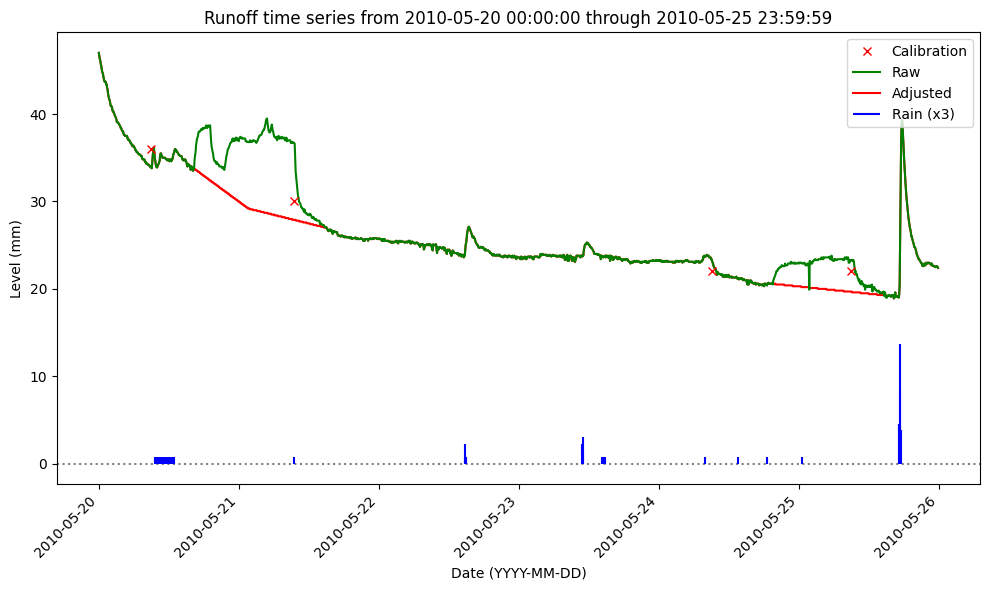

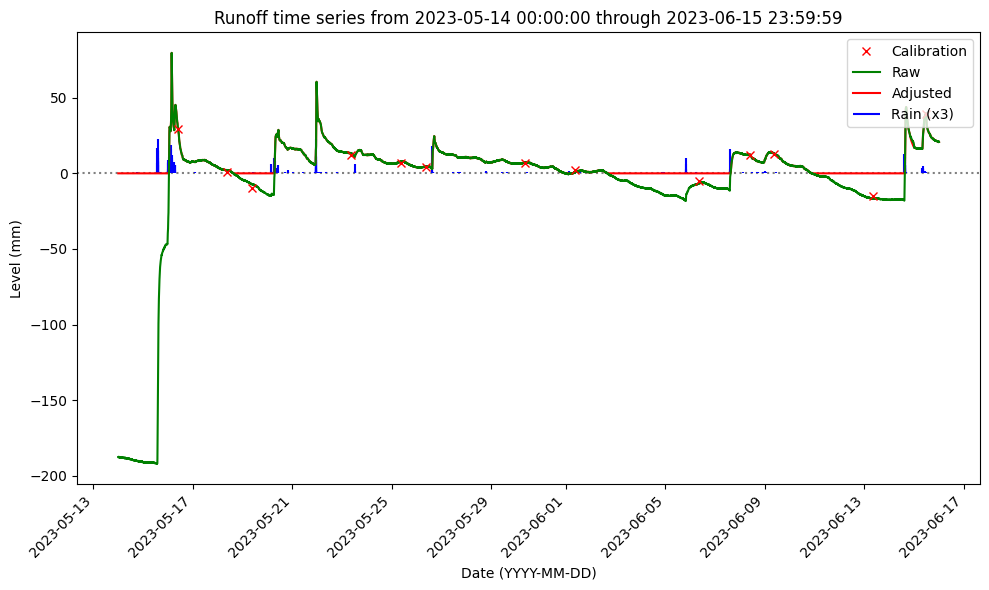

In [20]:
plot_between('2010-05-20 00:00:00','2010-05-25 23:59:59')
# plot_between('2020-05-31 00:00:00','2020-06-16 23:59:59')
plot_between('2023-05-14 00:00:00','2023-06-15 23:59:59')
# plot_between('2002-07-30 00:00:00','2002-08-02 23:59:59')

In [21]:
# plot_between('2013-01-02 18:59:38', '2014-08-22 10:21:32', include_calibration=False)
# plot_between('2012-12-15 00:00:00', '2013-01-02 23:59:59', include_calibration=False)
# data_combined['2012-12-25 00:00:00':'2012-12-28 23:59:59']

### Statistics

In [22]:
# Source insights
print(data_combined['1978-01-01 00:00:00':].groupby('source', dropna=False, observed=True)['raw'].agg(['count','mean', 'min', 'max']))

             count        mean    min     max
source                                       
CHART        14440 -285.531866 -999.0   551.0
CHART+AF    752435   52.028467    0.0   914.6
ISCO       1654936   46.714948 -999.0   956.6
ESTIMATED      290   14.797241   11.2    34.9
RADAR       702704   49.148286 -999.0  2904.5
TROLL         1428    0.000000    0.0     0.0
NaN         469814  -17.793236 -999.0  2876.0


In [23]:
# time_series = pd.Series(data_combined, index='datetime')
# time_series
# pd.DatetimeIndex.to_series(data_combined)
# time_series = pd.to_datetime(data_combined.index())

# data_sumstats = data_combined['raw'].dropna().resample('1YE').agg(['mean','std', 'min', 'max']).dropna()
# data_sumstats

# Removing values below 0
data_sumstats = data_combined[data_combined['raw'] >= 0]
# Get yearly averages and std
data_sumstats_yr = data_sumstats['raw'].dropna().resample('1YE').agg(['count', 'mean','std', 'min', 'max'])
# Get monthly averages and std
data_sumstats = data_sumstats['raw'].dropna().resample('1ME').agg(['mean','std'])

# Simplifying datetime to the year for readability
data_sumstats_yr = data_sumstats_yr.reset_index()
data_sumstats_yr['year'] = data_sumstats_yr['datetime'].dt.year
data_sumstats_yr = data_sumstats_yr.set_index('year').drop('datetime', axis=1)
print(data_sumstats_yr)

       count       mean         std   min      max
year                                              
1989   46331  57.122167   36.341293  11.1   666.30
1990  105120  52.775952   41.267992   0.0   837.40
1991  105119  46.408461   36.263957   0.1   792.80
1992  105138  55.170399   44.542390   0.0   914.60
1993  103355  55.816230   39.960546   8.8   811.50
1994  103930  47.014593   33.436377   0.0   652.00
1995  104666  47.177932   32.870785   8.0   745.00
1996   91542  63.420030   42.082399  14.0   915.00
1997   92617  36.132592   22.815107   6.1   516.70
1998  105120  45.890845   39.766625   0.0   685.10
1999  104940  66.865116   45.379963  12.7   877.90
2000  103845  47.657367   36.022096   5.3   730.70
2001  104925  37.953959   34.453080   4.6   835.90
2002  104200  43.508523   30.712091   4.1   609.70
2003  105120  46.990617   44.508037   0.0   789.10
2004  105406  50.627956   38.760783   0.0   765.70
2005  105120  44.653488   29.901670  10.8   956.60
2006  102224  54.132859   40.64

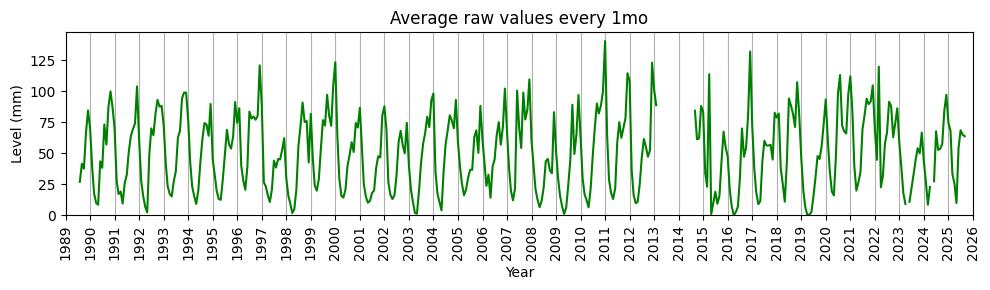

In [24]:
#Running avg plot

fig, ax = plt.subplots(figsize=(10, 3))
## Line for 0
# plt.axhline(y=0, color = "grey", linestyle = ":")
# Mean
ax.plot(data_sumstats.index, data_sumstats['mean'], color = 'green')
# ax.plot(data_sumstats.index, data_sumstats['mean'], color = 'green', label = "Mean")
# Ribbon for standard deviation
# ax.fill_between(data_sumstats.index, data_sumstats['mean']-data_sumstats['std'], data_sumstats['mean']+data_sumstats['std'], color = 'aquamarine', label = "std")
ax.set_xlabel("Year")
ax.set_ylabel("Level (mm)")
ax.set_title("Average raw values every 1mo")
ax.set_ylim(bottom = 0)
ax.set_xlim(left = dt.date(1989, 1, 1), right = dt.date(2026, 1, 1))
ax.xaxis.set_major_locator(mdates.YearLocator(month = 1)) # Show ticks at start of year
plt.xticks(rotation = 90)
plt.tight_layout()
plt.grid(axis = 'x', which = 'major')
# plt.legend(loc = 'upper right')
# Truncate plot
# ax.set_ylim(bottom = 0, top = 250)

plt.show()

del fig, ax

## Uniting

The calibration, combined (runoff), and rainfall data can be united into a single data frame.
Soil samples do not have the same granularity, so can be stored separately from these so as to avoid duplicated values.

In [ ]:
# ## TSTING UNIFICATION WITH SMALL SUBSET
# # data_united = data_combined['2010-01-01 00:00:00':'2010-12-31 23:59:59']
# # data_united = data_united.add_suffix("_runoff")
# mini_start = '2010-01-01 00:00:00'
# mini_end = '2010-12-31 23:59:59'
# mini_calibration = data_calibration[mini_start:mini_end]
# mini_combined = data_combined[mini_start:mini_end]
# mini_rain = data_rainfall[mini_start:mini_end]

# # pd.merge(mini_calibration, mini_combined, left_index=True, right_index=True, how='outer', suffixes=('_cal', '_runoff'))
# mini_united = pd.merge(mini_calibration.add_suffix("_cal"), mini_combined.add_suffix("_ro"), left_index=True, right_index=True, how='outer')
# mini_united = pd.merge(mini_rain.add_suffix("_rain"), mini_united, left_index=True, right_index=True, how='outer')
# # mini_united.rename(columns={'weir_level'})
# # mini_united.dropna(subset=['weir_level_cal'])

# # Checking to make sure sources match
# # mini_united["match_source"] = (mini_united["source_ro"] == mini_united["source_rain"]) | (mini_united["source_ro"].isnull() & mini_united["source_rain"].isnull())
# # mini_united[(mini_united["match_source"]==False)]
# # mini_united

# # mini_united = mini_united.drop("source_rain",axis=1)
# # mini_united.rename(columns={"source_ro":"source"})

In [26]:
## Another
# pd.merge(data_soil_deep.add_suffix("_shallow"), data_soil_deep.add_suffix("_deep"), left_index=True, right_index=True, how='outer')
united_soil = pd.merge(data_soil_shallow.reset_index(), data_soil_deep.reset_index(), on=["date", "sample"], suffixes=("_shallow", "_deep"), how="outer")
united_soil = united_soil.set_index('date')
# Modifying sample to int for sorting
united_soil["sample"] = united_soil["sample"].astype('int')
# Sorting for readability
united_soil = united_soil.sort_values(by=['date', 'sample'])
# Reset to category
united_soil["sample"] = united_soil["sample"].astype('category')
# Moving sample to front of data frame
soil_samples = united_soil.pop('sample')
united_soil.insert(0, 'sample', soil_samples)
del soil_samples
#
united_soil

# Missing values:
# united_soil[united_soil['h2o_by_wet_shallow'].isnull() | united_soil['h2o_by_wet_deep'].isnull()]

,sample,depth_shallow,h2o_by_wet_shallow,chk_note_shallow,chk_fail_shallow,depth_deep,h2o_by_wet_deep,chk_note_deep,chk_fail_deep
date,,,,,,,,,
1989-07-20,1,1-10,35.1,good,NaN,30-40,35.4,good,NaN
1989-07-20,2,1-10,40.4,good,NaN,30-40,37.1,good,NaN
1989-07-20,3,1-10,37.0,good,NaN,30-40,35.5,good,NaN
1989-07-20,4,1-10,38.8,good,NaN,30-40,35.1,good,NaN
1989-07-20,5,1-10,43.6,good,NaN,30-40,38.1,good,NaN
...,...,...,...,...,...,...,...,...,...
2025-06-26,6,1-10,47.6,nc,NaN,30-40,41.1,nc,NaN
2025-06-26,7,1-10,33.5,nc,NaN,30-40,32.2,nc,NaN
2025-06-26,8,1-10,46.9,nc,NaN,30-40,34.7,nc,NaN


In [27]:
# Checking column matching
# Checking to make sure sources match
def check_cols(input_df, input_col_left, input_col_right, find_mismatch=True):
    input_df["match"] = (input_df[input_col_left] == input_df[input_col_right]) | (input_df[input_col_left].isnull() & input_df[input_col_right].isnull())
    if find_mismatch == True:
        input_df = input_df[(input_df["match"]==False)]
    return input_df

# check_cols(mini_united, "source_ro", "source_rain")
# check_cols(mini_united, "chk_note_rain", "chk_note_ro")
# check_cols(mini_united, "comment_rain", "comment_ro")

# check_cols(mini_united, 'chk_note_rain', 'chk_note_ro')
# mini_united.dropna(subset="chk_note_rain")
# check_cols(mini_united, 'chk_fail_rain', 'chk_fail_rain')

In [ ]:
united_water = pd.merge(data_rainfall.add_suffix("_rain"), data_combined.add_suffix("_ro"), left_index=True, right_index=True, how='outer')
united_water = pd.merge(data_calibration.add_suffix("_cal"), united_water, left_index=True, right_index=True, how='outer')
united_water.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3624255 entries, 1989-07-19 11:55:00 to 2025-08-01 13:00:00
Data columns (total 11 columns):
 #   Column          Dtype   
---  ------          -----   
 0   weir_level_cal  float64 
 1   ra_rain         float64 
 2   raw_rain        float64 
 3   chk_note_rain   category
 4   chk_fail_rain   object  
 5   level_ro        float64 
 6   raw_ro          float64 
 7   chk_note_ro     category
 8   chk_fail_ro     object  
 9   comment_ro      object  
 10  source_ro       category
dtypes: category(3), float64(5), object(3)
memory usage: 259.2+ MB


In [29]:
## Another
united_soil = pd.merge(data_soil_shallow.reset_index(), data_soil_deep.reset_index(), on=["date", "sample"], suffixes=("_shallow", "_deep"), how="outer")
united_soil = united_soil.set_index('date')
# Modifying sample to int for sorting
united_soil["sample"] = united_soil["sample"].astype('int')
# Sorting for readability
united_soil = united_soil.sort_values(by=['date', 'sample'])
# Reset to category
united_soil["sample"] = united_soil["sample"].astype('category')
# Moving sample to front of data frame
soil_samples = united_soil.pop('sample')
united_soil.insert(0, 'sample', soil_samples)
#
united_soil.info()

# Missing values:
# united_soil[united_soil['h2o_by_wet_shallow'].isnull() | united_soil['h2o_by_wet_deep'].isnull()]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12376 entries, 1989-07-20 to 2025-06-26
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   sample              12376 non-null  category
 1   depth_shallow       12371 non-null  category
 2   h2o_by_wet_shallow  12371 non-null  float64 
 3   chk_note_shallow    12371 non-null  category
 4   chk_fail_shallow    54 non-null     object  
 5   depth_deep          12369 non-null  category
 6   h2o_by_wet_deep     12369 non-null  float64 
 7   chk_note_deep       12369 non-null  category
 8   chk_fail_deep       11 non-null     object  
dtypes: category(5), float64(2), object(2)
memory usage: 544.9+ KB


In [30]:
united_soil_mini = united_soil[['sample', 'h2o_by_wet_shallow', 'h2o_by_wet_deep']]
united_soil_mini = united_soil_mini.groupby('sample').resample('1ME').mean().reset_index().set_index('date')
# united_soil_mini = united_soil[['h2o_by_wet_shallow', 'h2o_by_wet_deep']]
# united_soil_mini = united_soil_mini.resample('1ME').mean()#.reset_index().set_index('date')

united_soil_mini

/var/folders/dr/4_7b2hbn60q7cynx4gmn5vhr0000gp/T/ipykernel_85595/1896404186.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  united_soil_mini = united_soil_mini.groupby('sample').resample('1ME').mean().reset_index().set_index('date')


,sample,h2o_by_wet_shallow,h2o_by_wet_deep
date,,,
1989-07-31,1,37.650000,36.650000
1989-08-31,1,37.050000,36.450000
1989-09-30,1,37.500000,36.550000
1989-10-31,1,38.900000,35.700000
1989-11-30,1,39.250000,37.450000
...,...,...,...
2025-04-30,10,NaN,NaN
2025-05-31,10,30.033333,29.233333
2025-06-30,10,37.650000,35.850000


/var/folders/dr/4_7b2hbn60q7cynx4gmn5vhr0000gp/T/ipykernel_85595/714418589.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for category, group_df in united_soil_mini.groupby('sample'):


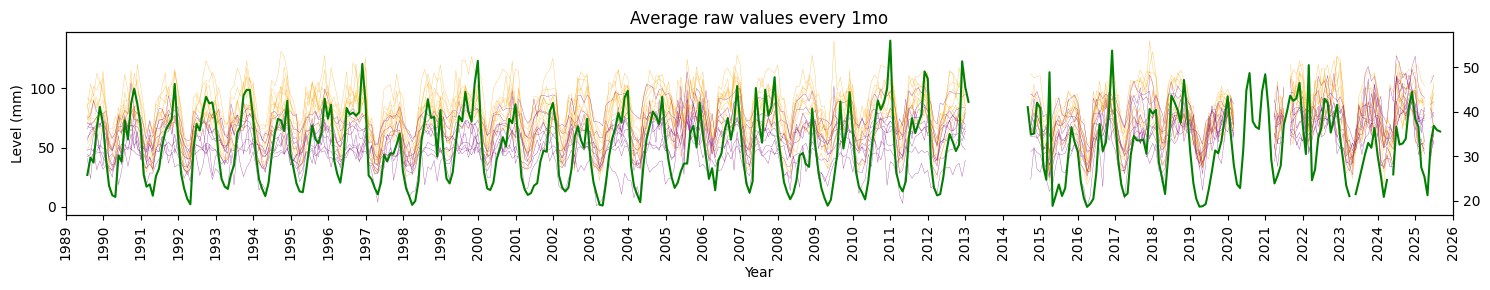

In [31]:
#Running avg plot

fig, ax = plt.subplots(figsize=(15, 3))
## Line for 0
# plt.axhline(y=0, color = "grey", linestyle = ":")
# Mean
# ax.plot(united_soil_mini.index, united_soil_mini['h2o_by_wet_shallow'], color = 'pink')
# ax.plot(united_soil_mini.index, united_soil_mini['h2o_by_wet_deep'], color = 'purple')

ax2 = ax.twinx()
# zord = 1
for category, group_df in united_soil_mini.groupby('sample'):
    # ax2.plot(group_df.index, group_df['h2o_by_wet_shallow'], label=category, alpha=0.5, color='orange', linewidth = 0.25, zord = 1)
    ax2.plot(group_df.index, group_df['h2o_by_wet_shallow'], label=category, alpha=0.75, color='orange', linewidth = 0.25)
    # zord += 1
# for category, group_df in united_soil_mini.groupby('sample'):
    ax2.plot(group_df.index, group_df['h2o_by_wet_deep'], label=category, alpha=0.75, color='purple', linewidth = 0.25)
    # zord += 1
# ax.plot(united_soil_mini.index, united_soil_mini['h2o_by_wet_shallow'], label="Shallow", color='orange', linewidth = 0.5)
# ax.plot(united_soil_mini.index, united_soil_mini['h2o_by_wet_deep'], label="Deep", color='purple', linewidth = 0.5)

# ax.plot(data_sumstats.index, data_sumstats['mean'], color = 'green', zorder = zord)
ax.plot(data_sumstats.index, data_sumstats['mean'], color = 'green')

# ax.plot(data_sumstats.index, data_sumstats['mean'], color = 'green', label = "Mean")
# Ribbon for standard deviation
# ax.fill_between(data_sumstats.index, data_sumstats['mean']-data_sumstats['std'], data_sumstats['mean']+data_sumstats['std'], color = 'aquamarine', label = "std")
ax.set_xlabel("Year")
ax.set_ylabel("Level (mm)")
ax.set_title("Average raw values every 1mo")
# ax.set_ylim(bottom = 0)
ax.set_xlim(left = dt.date(1989, 1, 1), right = dt.date(2026, 1, 1))
ax.xaxis.set_major_locator(mdates.YearLocator(month = 1)) # Show ticks at start of year
plt.xticks(rotation = 90)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.grid(axis = 'x', which = 'major')
# plt.legend(loc = 'upper right')
# Truncate plot
# ax.set_ylim(bottom = 0, top = 250)

# Set moisture plot to back
ax2.set_zorder(1)
# Set mean line to be in front
ax.set_zorder(2)
# Change background of mean line plot transparent
ax.patch.set_visible(False)

plt.show()

del fig, ax#, zord

In [32]:
# united_soil[('h2o_by_wet_shallow', 'h2o_by_wet_deep')]#.resample('1YE').agg(['mean', 'std'])
# united_sumstats_soil = pd.DataFrame()
# united_sumstats_soil = united_soil['h2o_by_wet_shallow'].dropna().resample('1YE').mean()
# united_sumstats_soil['h2o_by_wet_deep'] = united_soil['h2o_by_wet_deep'].dropna().resample('1YE').mean()
# united_sumstats_soil
# united_soil.groupby('sample')
# united_soil['h2o_by_wet_shallow'].dropna().resample('1YE').mean()
# united_soil
# united_soil_test = united_soil.groupby('sample')
united_soil_test = united_soil[['sample', 'h2o_by_wet_shallow']]
# united_soil.resample('1YE')['h2o_by_wet_shallow'].dropna().mean()
# united_soil_test.groupby('sample').resample('1YE').mean()#.dropna().mean()
print(united_soil_test.groupby('sample').resample('1YE').mean())

# # Removing values below 0
# data_sumstats = data_combined[data_combined['raw'] >= 0]
# # Get yearly averages and std
# data_sumstats_yr = data_sumstats['raw'].dropna().resample('1YE').agg(['count', 'mean','std', 'min', 'max'])
# # Get monthly averages and std
# data_sumstats = data_sumstats['raw'].dropna().resample('1ME').agg(['mean','std'])

# # Simplifying datetime to the year for readability
# data_sumstats_yr = data_sumstats_yr.reset_index()
# data_sumstats_yr['year'] = data_sumstats_yr['datetime'].dt.year
# data_sumstats_yr = data_sumstats_yr.set_index('year').drop('datetime', axis=1)
# print(data_sumstats_yr)

                   h2o_by_wet_shallow
sample date                          
1      1989-12-31           38.083333
       1990-12-31           34.953125
       1991-12-31           34.168571
       1992-12-31           34.729730
       1993-12-31           36.242424
...                               ...
10     2023-12-31           33.842000
       2024-12-31           33.486735
       2025-12-31           31.857692
68     2005-12-31           39.500000
70     2005-12-31           43.500000

[372 rows x 1 columns]


/var/folders/dr/4_7b2hbn60q7cynx4gmn5vhr0000gp/T/ipykernel_85595/3528937607.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(united_soil_test.groupby('sample').resample('1YE').mean())
